In [39]:
import pandas as pd 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = sns.load_dataset("tips")

In [5]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


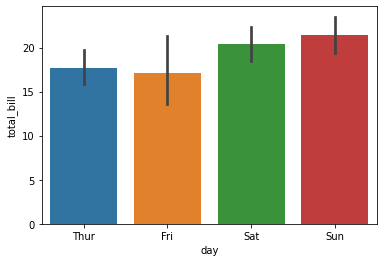

In [8]:
#We will try to find the confidence interval for day column where equals to Friday. We have two ways one of them is shor and other is a bit longer.

sns.barplot(x=df["day"], y=df["total_bill"]);

In [20]:
#First of all, we have to determine the upper and lower values of black stripe on the bar for the day of Friday

mean= df[df["day"] == "Fri"]["total_bill"].mean()


In [13]:
#Finding standard deviation...
df[df["day"] == "Fri"]["total_bill"].std()

8.302659723217145

In [16]:
#Computing standard error of mean

sem = df[df["day"] == "Fri"]["total_bill"].sem()
sem

1.9047607734794163

In [17]:
#Finding the value of margin of error. Our formula is z * sem. 
z= 1.96
moe = z * sem 
moe 

3.733331116019656

In [18]:
17.15157894736842 - 3.733331116019656


13.418247831348765

In [21]:
lower_limit= ortalama - moe 
lower_limit

13.418247831348765

In [22]:
upper_limit = ortalama + moe
upper_limit

20.884910063388077

In [24]:
#Our lower value is 13.41 and upper value is 20.88. We have computed manually. Now, we will do below in a shorter way.

In [26]:
#All computes done above can be done just by this single row code below.
stats.norm.interval(0.95, loc=mean, scale=sem)

(13.41831643218411, 20.884841462552732)

In [27]:
n = len(df[df["day"] =="Fri"]["total_bill"])
n

19

In [40]:
#All computes done above are computed with z score. However, we will do same computes with t score. I have to emphasize that t score is more suitable
#and accurate.

In [41]:
# With t distribution
stats.t.interval(0.95, df=n-1, loc=ortalama, scale=sem)


(15.016185889961312, 19.286972004775528)

In [36]:
#not: biz norm ile hesapladığımız zaman t ile hesapladığımız gerçek değere yakınsıyoruz. ama t ile heasplanan daha kesin ve daha doğru.

In [45]:
#eğer güven aralığını artırırsak gelen aralık daha geniş olur
#if we increase our confidence interval we will have a larger interval 

a = stats.t.interval(0.95, df=n-1, loc=ortalama, scale=sem)
b = stats.t.interval(0.99, df=n-1, loc=ortalama, scale=sem)
print(a)
print(b)

(15.016185889961312, 19.286972004775528)
(14.22591027244355, 20.077247622293292)


In [42]:
#For the day which is Saturday

In [31]:
len(df[df["day"] == "Sat"]["total_bill"])

87

In [34]:
stats.t.interval(0.95, df=87-1, loc=df[df["day"] == "Sat"]["total_bill"].mean(), scale=1.016407566061897)

(18.420827942450163, 22.461930678239487)

In [32]:
sem = df[df["day"] == "Sat"]["total_bill"].sem()

In [33]:
sem

1.016407566061897

In [38]:
stats.t.interval(0.99, df=87-1, loc=df[df["day"] == "Sat"]["total_bill"].mean(), scale=1.016407566061897)

(17.76394599025322, 23.11881263043643)